# Bike Sharing Company Assignment


## Description:
BoomBikes Company -A bike-sharing system/provider is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Technical Objective:

The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps:
1. Read and visualise the Dataset
2. Data preparation
3. Split the data set into train and test sets
4. Build Model with training dataset
5. Estimation
6. Inference
7. Model Prediction

## Step1: Read and visualise the Dataset

### a. Reading and Understanding of Data

In [1]:
# Import header files
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#load/read data 
Bike = pd.read_csv("day.csv", low_memory=False)


In [4]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insight:
All are numberic variables and no missing data

### Dataset characteristics

day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)m
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Insight:
1. We need predit the cnt column - count of total rental bikes 
so,our traget variable is 'cnt'

##### cnt is an continous variable, and there are multiple features available - Choosing multiple linear regression model for the prediction

In [5]:
#check the size
Bike.shape

(730, 16)

### Insight:
There are 730 rows and 16 columns

In [6]:
#check the head of dataset
Bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
#check the tail of dataset
Bike.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

### Insight:

Instant column is the index value - which is not needed

In [8]:
Bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Insight:
1.There are no missing data.

2.All values are numeric.

3.There are 730 entries and 16 columns.

4.Values are in different ranges.

### b. Data Visualization

#### Numeric Data Analysis
All the data in the table Numeric except Date

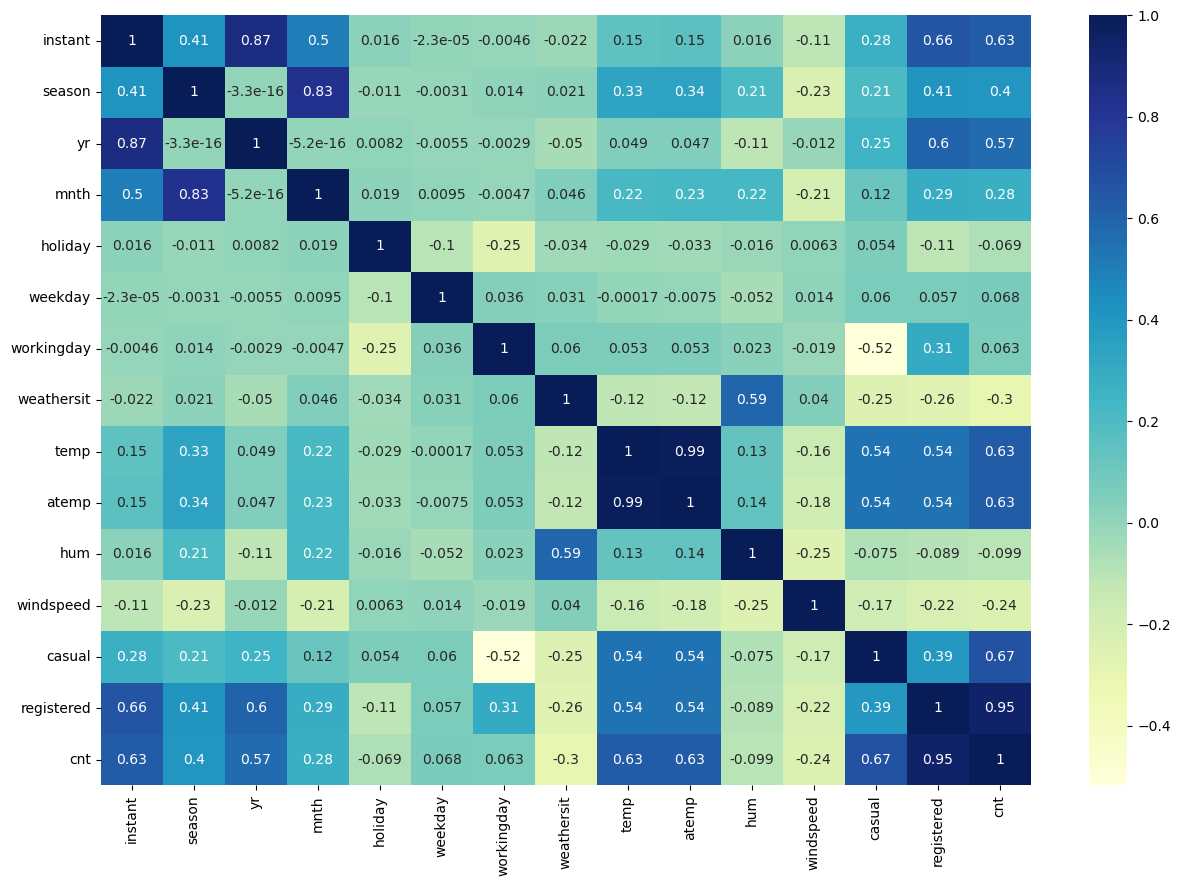

In [9]:
# lets check the correlation to see which variables are highly correlated

plt.figure(figsize = (15,10))
sns.heatmap(Bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insight:
High correlation observed  for cnt with temp and atemp 
( ignoring instant , casual,registered)

### Pairplot for Visualization

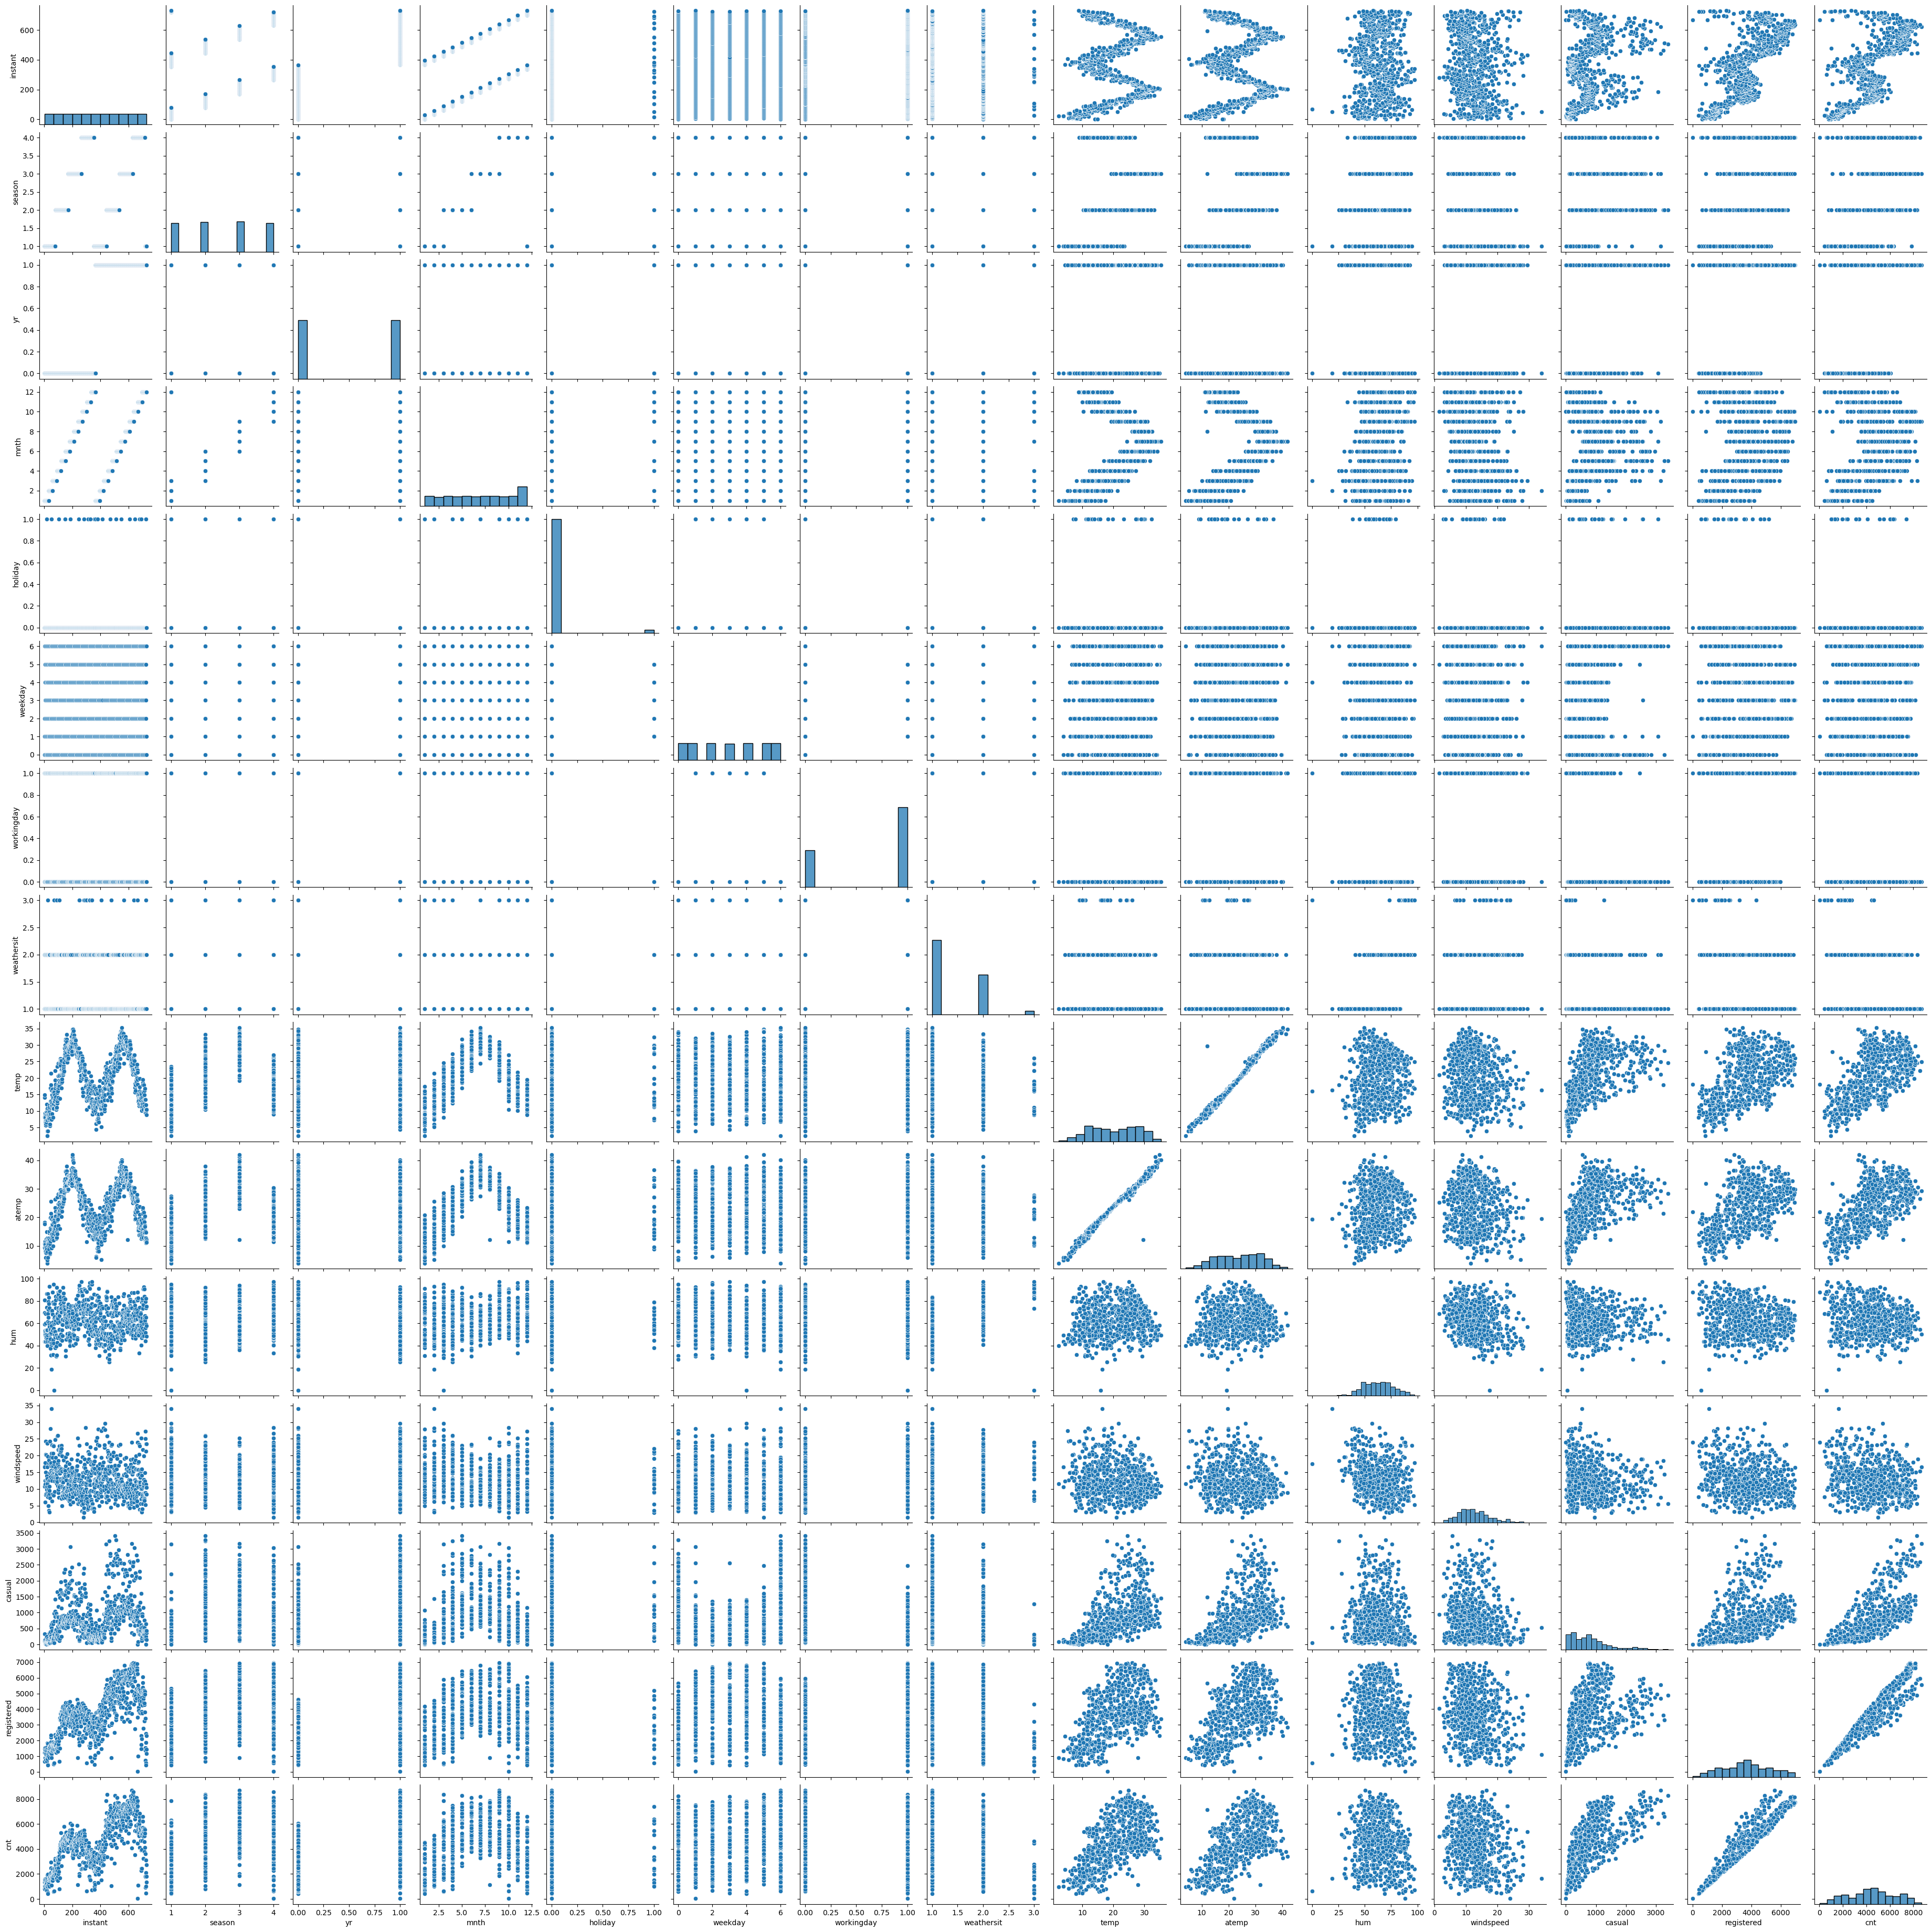

In [10]:
sns.pairplot(Bike)
plt.show()

### Insight:
1. Right side plots looks highly correlated.
2. cnt is having linearity with temp, atemp ( ignoring casual,registered)
3. We can observe that few columns are highly correlated from both Correlation and pairplot


### c. Data Cleanup:

### Drop unwanted columns
1. instant - Index column is not needed
2. dteday - date column is not needed as the data is available in Different columns

3. casual + registered = cnt, these two columns not needed and cnt need to be predicted

#### The model should be built taking this 'cnt' as the target variable.

In [11]:
#Drop column list
datalist = ['instant','dteday', 'casual', 'registered']
#Drop columns
Bike = Bike.drop(datalist, axis = 1)

### d.Data Analysis

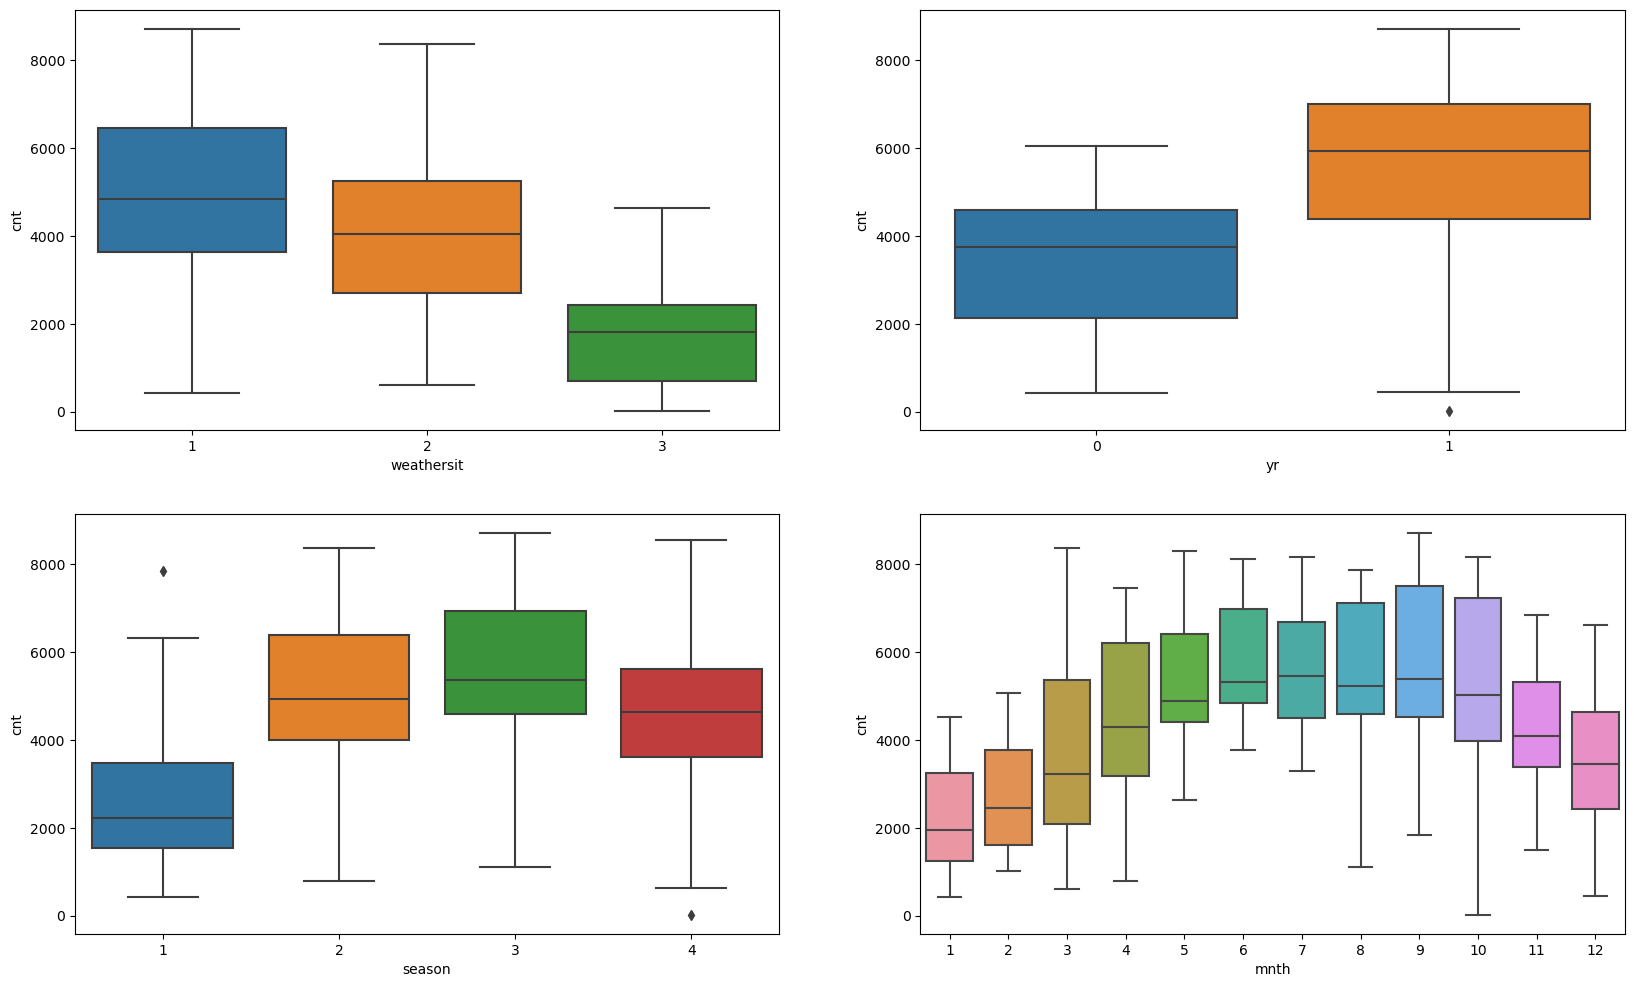

In [12]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.boxplot(x='weathersit', y = 'cnt', data = Bike)
plt.subplot(2,2,2)
sns.boxplot(x='yr', y = 'cnt', data = Bike)
plt.subplot(2,2,3)
sns.boxplot(x='season', y = 'cnt', data = Bike)
plt.subplot(2,2,4)
sns.boxplot(x='mnth', y = 'cnt', data = Bike)
plt.show()

### Insight:
1. Weathersit is having only 3 values - no bike is used during 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
2. All the above columns ar having some impact on the cnt variable

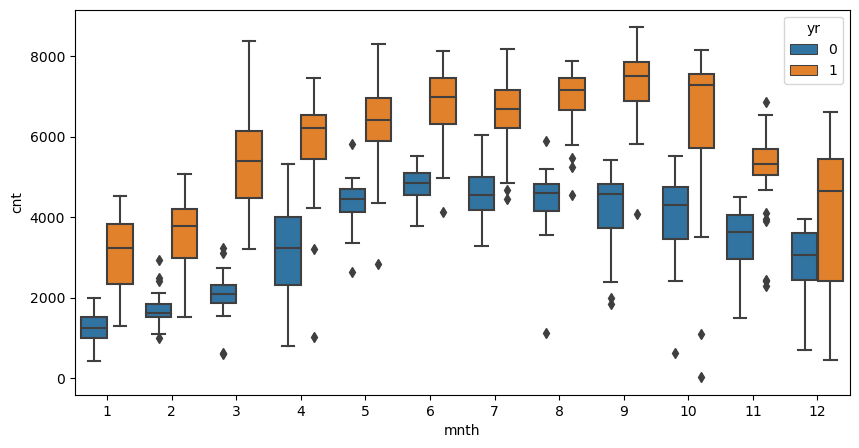

In [13]:
# as there are two years lets plot and understand in detail
# Multivariante analysis  - cnt, year, month
plt.figure(figsize=(10,5))
sns.boxplot(x='mnth', y = 'cnt', hue = 'yr', data = Bike)
plt.show()

### Insight:
1. Usage of bikes are high in year 2019 (0-2018, 1-2019)
2. Usage is more from 3rd month

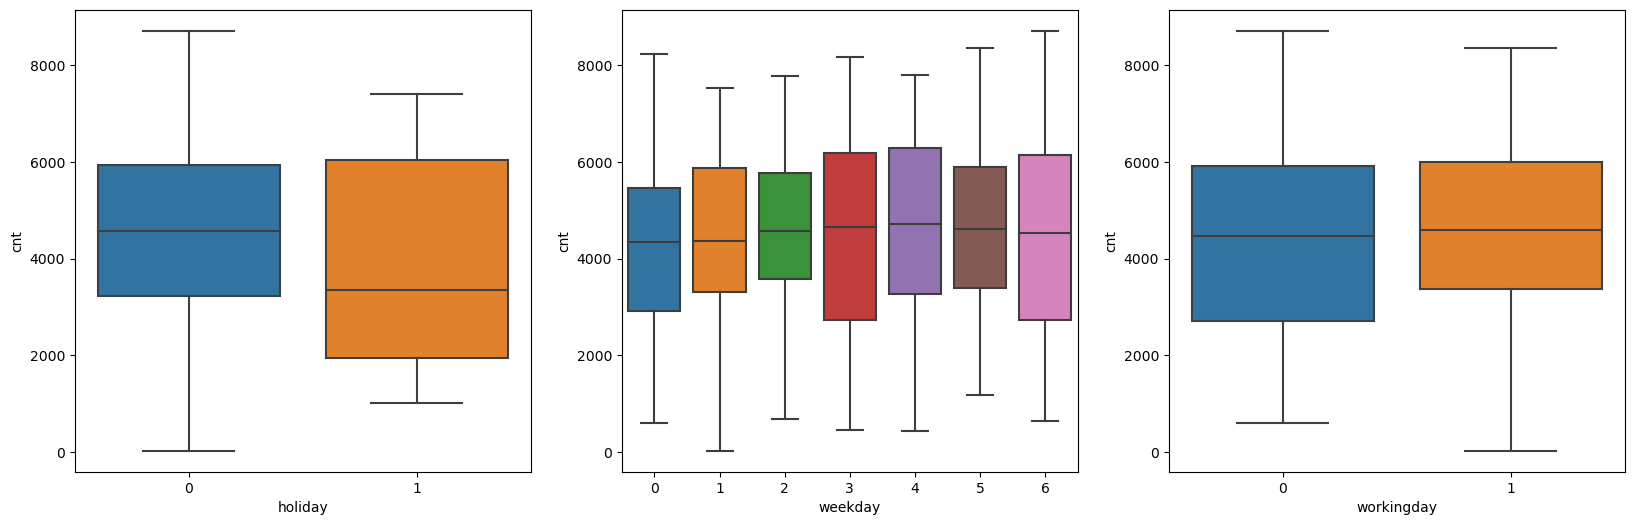

In [14]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.boxplot(x='holiday', y = 'cnt', data = Bike)
plt.subplot(1,3,2)
sns.boxplot(x='weekday', y = 'cnt', data = Bike)
plt.subplot(1,3,3)
sns.boxplot(x='workingday', y = 'cnt', data = Bike)

plt.show()

#### Insight:
1. Even though above columns are numeric we need to treat them as Categorical variables
2. Create dummy variables 

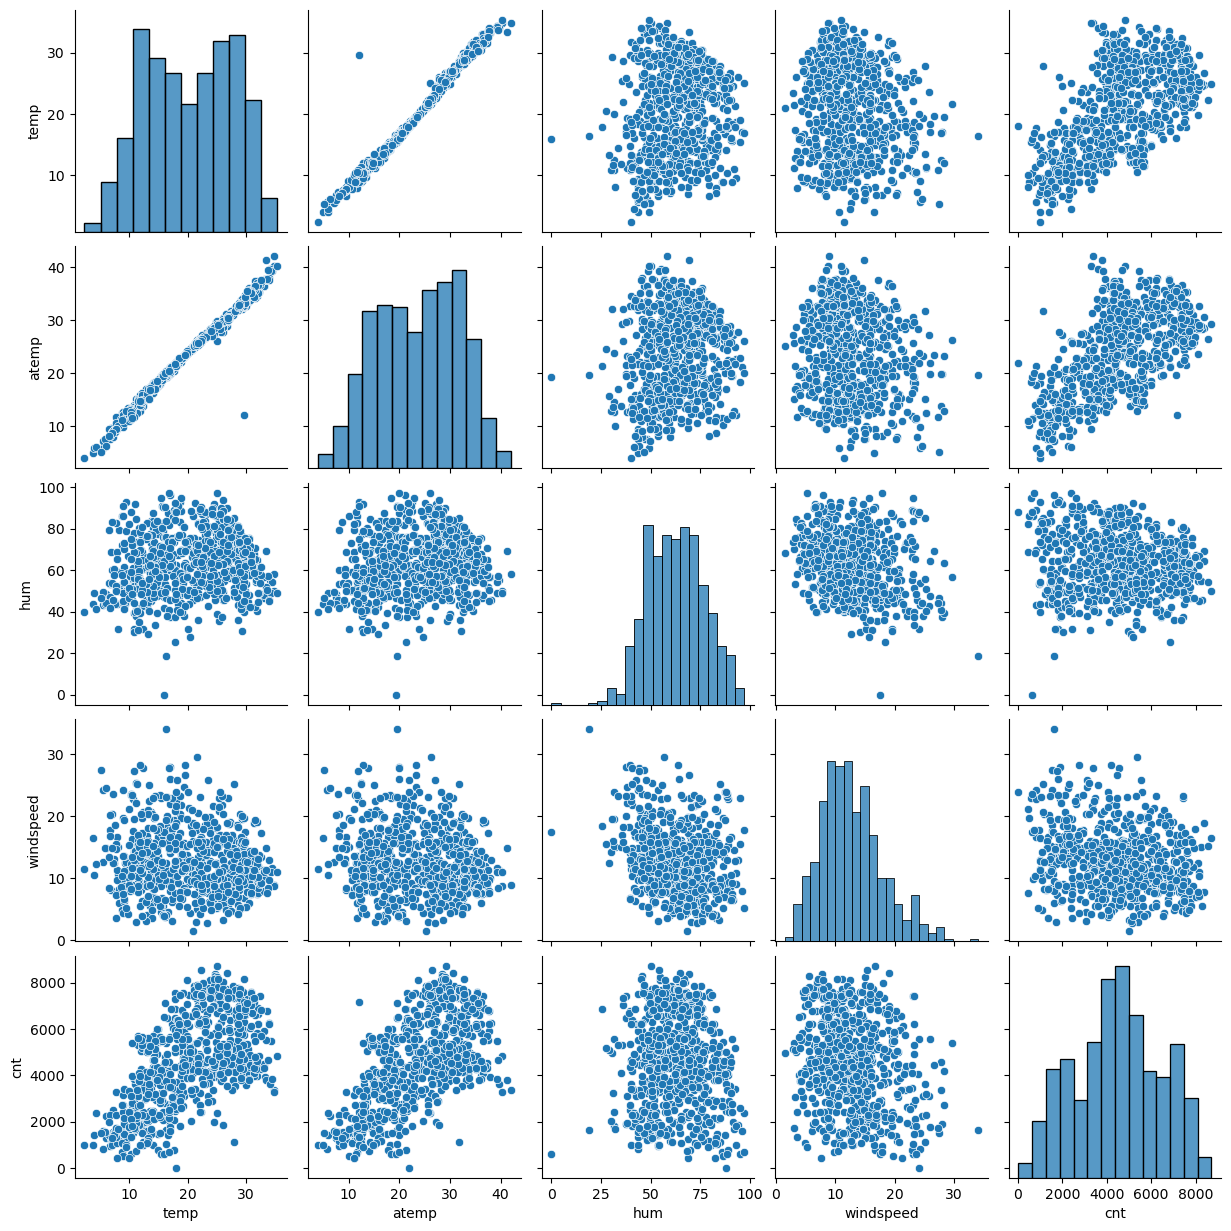

In [15]:
datalist = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(Bike[datalist])
plt.show()

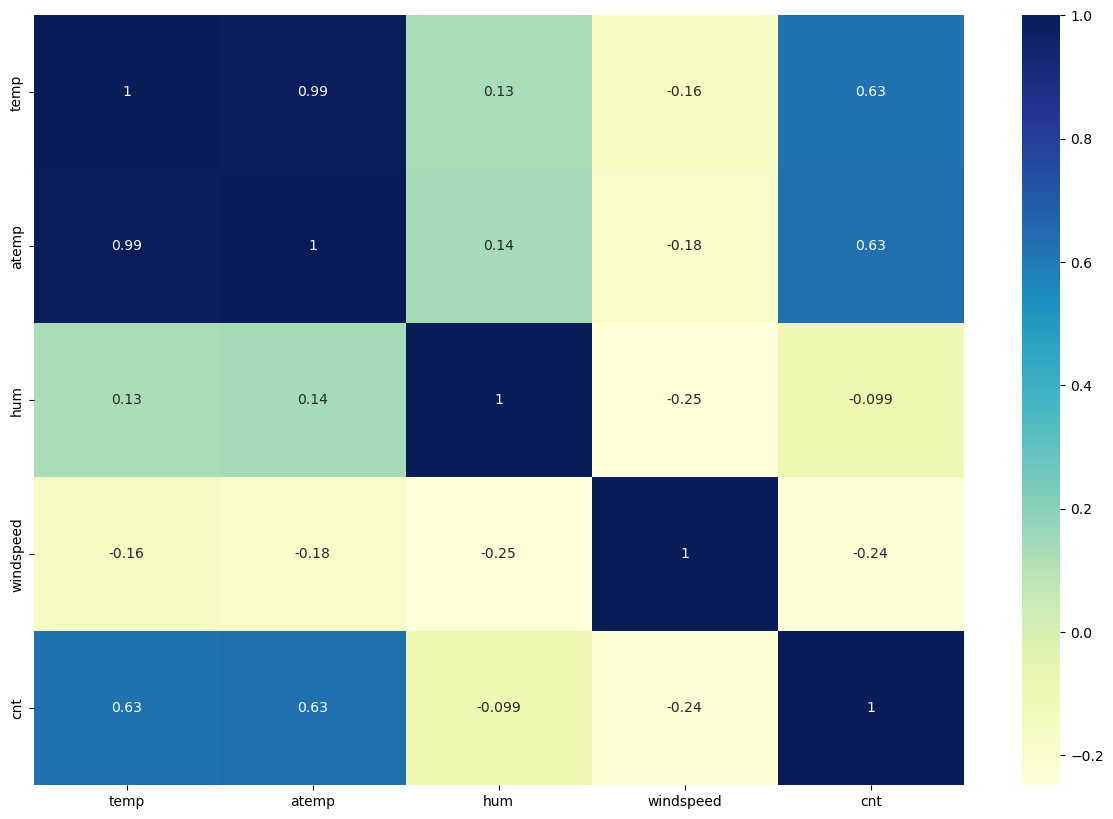

In [16]:
# Check correlation for the same variables
plt.figure(figsize = (15,10))
sns.heatmap(Bike[datalist].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:
1. High correlation between temp and atemp columns -0.99 ,we can consider one column.
2. Correlation of temp and atemp is same with the cnt(target variable) - 0.63
2. for Bike ride feel temperater will be better to choose than the actual temperature - analyse with linear regression
2. atemp column is having high correlation with the target variable cnt

## Step2 : Data Preparation

### a. Creating the dummy variables for categorical variables using One hot encoding
Categorical Variables :
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week - 0,6 are non working days(weekend)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Note: No need to create dummy variables for holiday and working day as it is similar to yes and no and holding 0 and 1 value

In [17]:
seasons = pd.get_dummies(Bike.season, drop_first = True)

In [18]:
seasons

2  3  4
0    0  0  0
1    0  0  0
2    0  0  0
3    0  0  0
4    0  0  0
..  .. .. ..
725  0  0  0
726  0  0  0
727  0  0  0
728  0  0  0
729  0  0  0

[730 rows x 3 columns]

### Insight
1. As all categorical variable are  having value in range [0-12] , it is needed to change the column names

In [19]:
#renaming column names for seasons table
seasons.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace = True)
seasons

summer  fall  winter
0         0     0       0
1         0     0       0
2         0     0       0
3         0     0       0
4         0     0       0
..      ...   ...     ...
725       0     0       0
726       0     0       0
727       0     0       0
728       0     0       0
729       0     0       0

[730 rows x 3 columns]

In [20]:
# Dummy variables for weekday (sunday is dropped) and renaming columns name
weekday = pd.get_dummies(Bike.weekday,drop_first = True)
weekday.rename(columns={1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace = True)
weekday

mon  tue  wed  thu  fri  sat
0      0    0    0    0    0    1
1      0    0    0    0    0    0
2      1    0    0    0    0    0
3      0    1    0    0    0    0
4      0    0    1    0    0    0
..   ...  ...  ...  ...  ...  ...
725    0    0    0    1    0    0
726    0    0    0    0    1    0
727    0    0    0    0    0    1
728    0    0    0    0    0    0
729    1    0    0    0    0    0

[730 rows x 6 columns]

In [21]:
# Dummy variables for weather (clear weather is dropped) and renaming columns name
weather = pd.get_dummies(Bike.weathersit,drop_first = True)
weather.rename(columns={1:'w_clear', 2:'w_mist', 3:'w_light'}, inplace = True)
weather

w_mist  w_light
0         1        0
1         1        0
2         0        0
3         0        0
4         0        0
..      ...      ...
725       1        0
726       1        0
727       1        0
728       0        0
729       1        0

[730 rows x 2 columns]

In [22]:
#Dummy variables for year 
year = pd.get_dummies(Bike.yr, drop_first = True)
year.rename(columns={1:'yr_2019'}, inplace = True)
year

yr_2019
0          0
1          0
2          0
3          0
4          0
..       ...
725        1
726        1
727        1
728        1
729        1

[730 rows x 1 columns]

In [23]:
# Dummy variables for weather (jan is dropped) and add prefix as month to the columns
month = pd.get_dummies(Bike.mnth,drop_first= True)
month = month.add_prefix("month_")
month

month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
725        0        0        0        0        0        0        0        0   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
725         0         0         1  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  

[730 rows x 11 columns]

In [24]:
# Creating list for catgorical columns
catlist = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

# Drop the categorical columns from the Bike table.
Bike_New = Bike.drop(catlist, axis = 1)

#Creating table for all dummy variables(categorial variables)
cat_concat = pd.concat([seasons, year, month, weekday, weather], axis = 1)

# Concat the dummy variable table with the Bike_New (main)
Bike_New = pd.concat([Bike_New,cat_concat], axis = 1)

In [25]:
Bike_New.shape

(730, 30)

### Insight:
There are 30 columns after coverting the categorical variables into dummy

In [26]:
Bike_New.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  summer  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       0   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       0   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       0   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       0   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       0   

   fall  winter  ...  month_11  month_12  mon  tue  wed  thu  fri  sat  \
0     0       0  ...         0         0    0    0    0    0    0    1   
1     0       0  ...         0         0    0    0    0    0    0    0   
2     0       0  ...         0         0    1    0    0    0    0    0   
3     0       0  ...         0         0    0    1    0    0    0    0   
4     0       0  ...         0         0    0    0    1    0    0    0   

   w_mist  w_light  
0       1        0  
1       1        0  
2       0        0  
3       0        0  
4       0        0  

[5 rows x 30 columns]

## Step 3: Splitting the dataset into Training and Test sets

### a. The First basis step in regression is performing Training - Test split 

In [27]:
#import sklearn for splitting
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(0)
# Data split into 70:30 ratio of train and test 
df_train, df_test = train_test_split(Bike_New,train_size = 0.7, test_size = 0.3, random_state =100 )


### b.Rescaling the features
as we saw the data was in different ranges
-Scaling will not impact any parameters except co-efficient and this will help ease of interpretation of linear model

We are using MinMax scaling

In [29]:
# Import 
from sklearn.preprocessing import MinMaxScaler


In [30]:
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except dummy and 0, 1 variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  0.864243   
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           0  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   

     summer  fall  winter  ...  month_11  month_12  mon  tue  wed  thu  fri  \
653       0     0       1  ...         0         0    0    1    0    0    0   
576       0     1       0  ...         0         0    0    1    0    0    0   
426       0     0       0  ...         0         0    0    0    0    0    0   
728       0     0       0  ...         0         1    0    0    0    0    0   
482       1     0       0  ...         0         0    0    0    0    0    0   

     sat  w_mist  w_light  
653    0       0        0  
576    0       0        0  
426    1       1        0  
728    0       0        0  
482    1       1        0  

[5 rows x 30 columns]

In [33]:
df_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.676471    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.468282    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      summer        fall     winter  ...    month_11  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.245098    0.262745    0.24902  ...    0.086275   
std      0.224593    0.430568    0.440557    0.43287  ...    0.281045   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    1.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

         month_12         mon         tue         wed         thu         fri  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.150980    0.131373    0.158824    0.133333    0.127451   
std      0.278131    0.358381    0.338139    0.365870    0.340268    0.333805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              sat      w_mist     w_light  
count  510.000000  510.000000  510.000000  
mean     0.154902    0.343137    0.029412  
std      0.362166    0.475223    0.169124  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

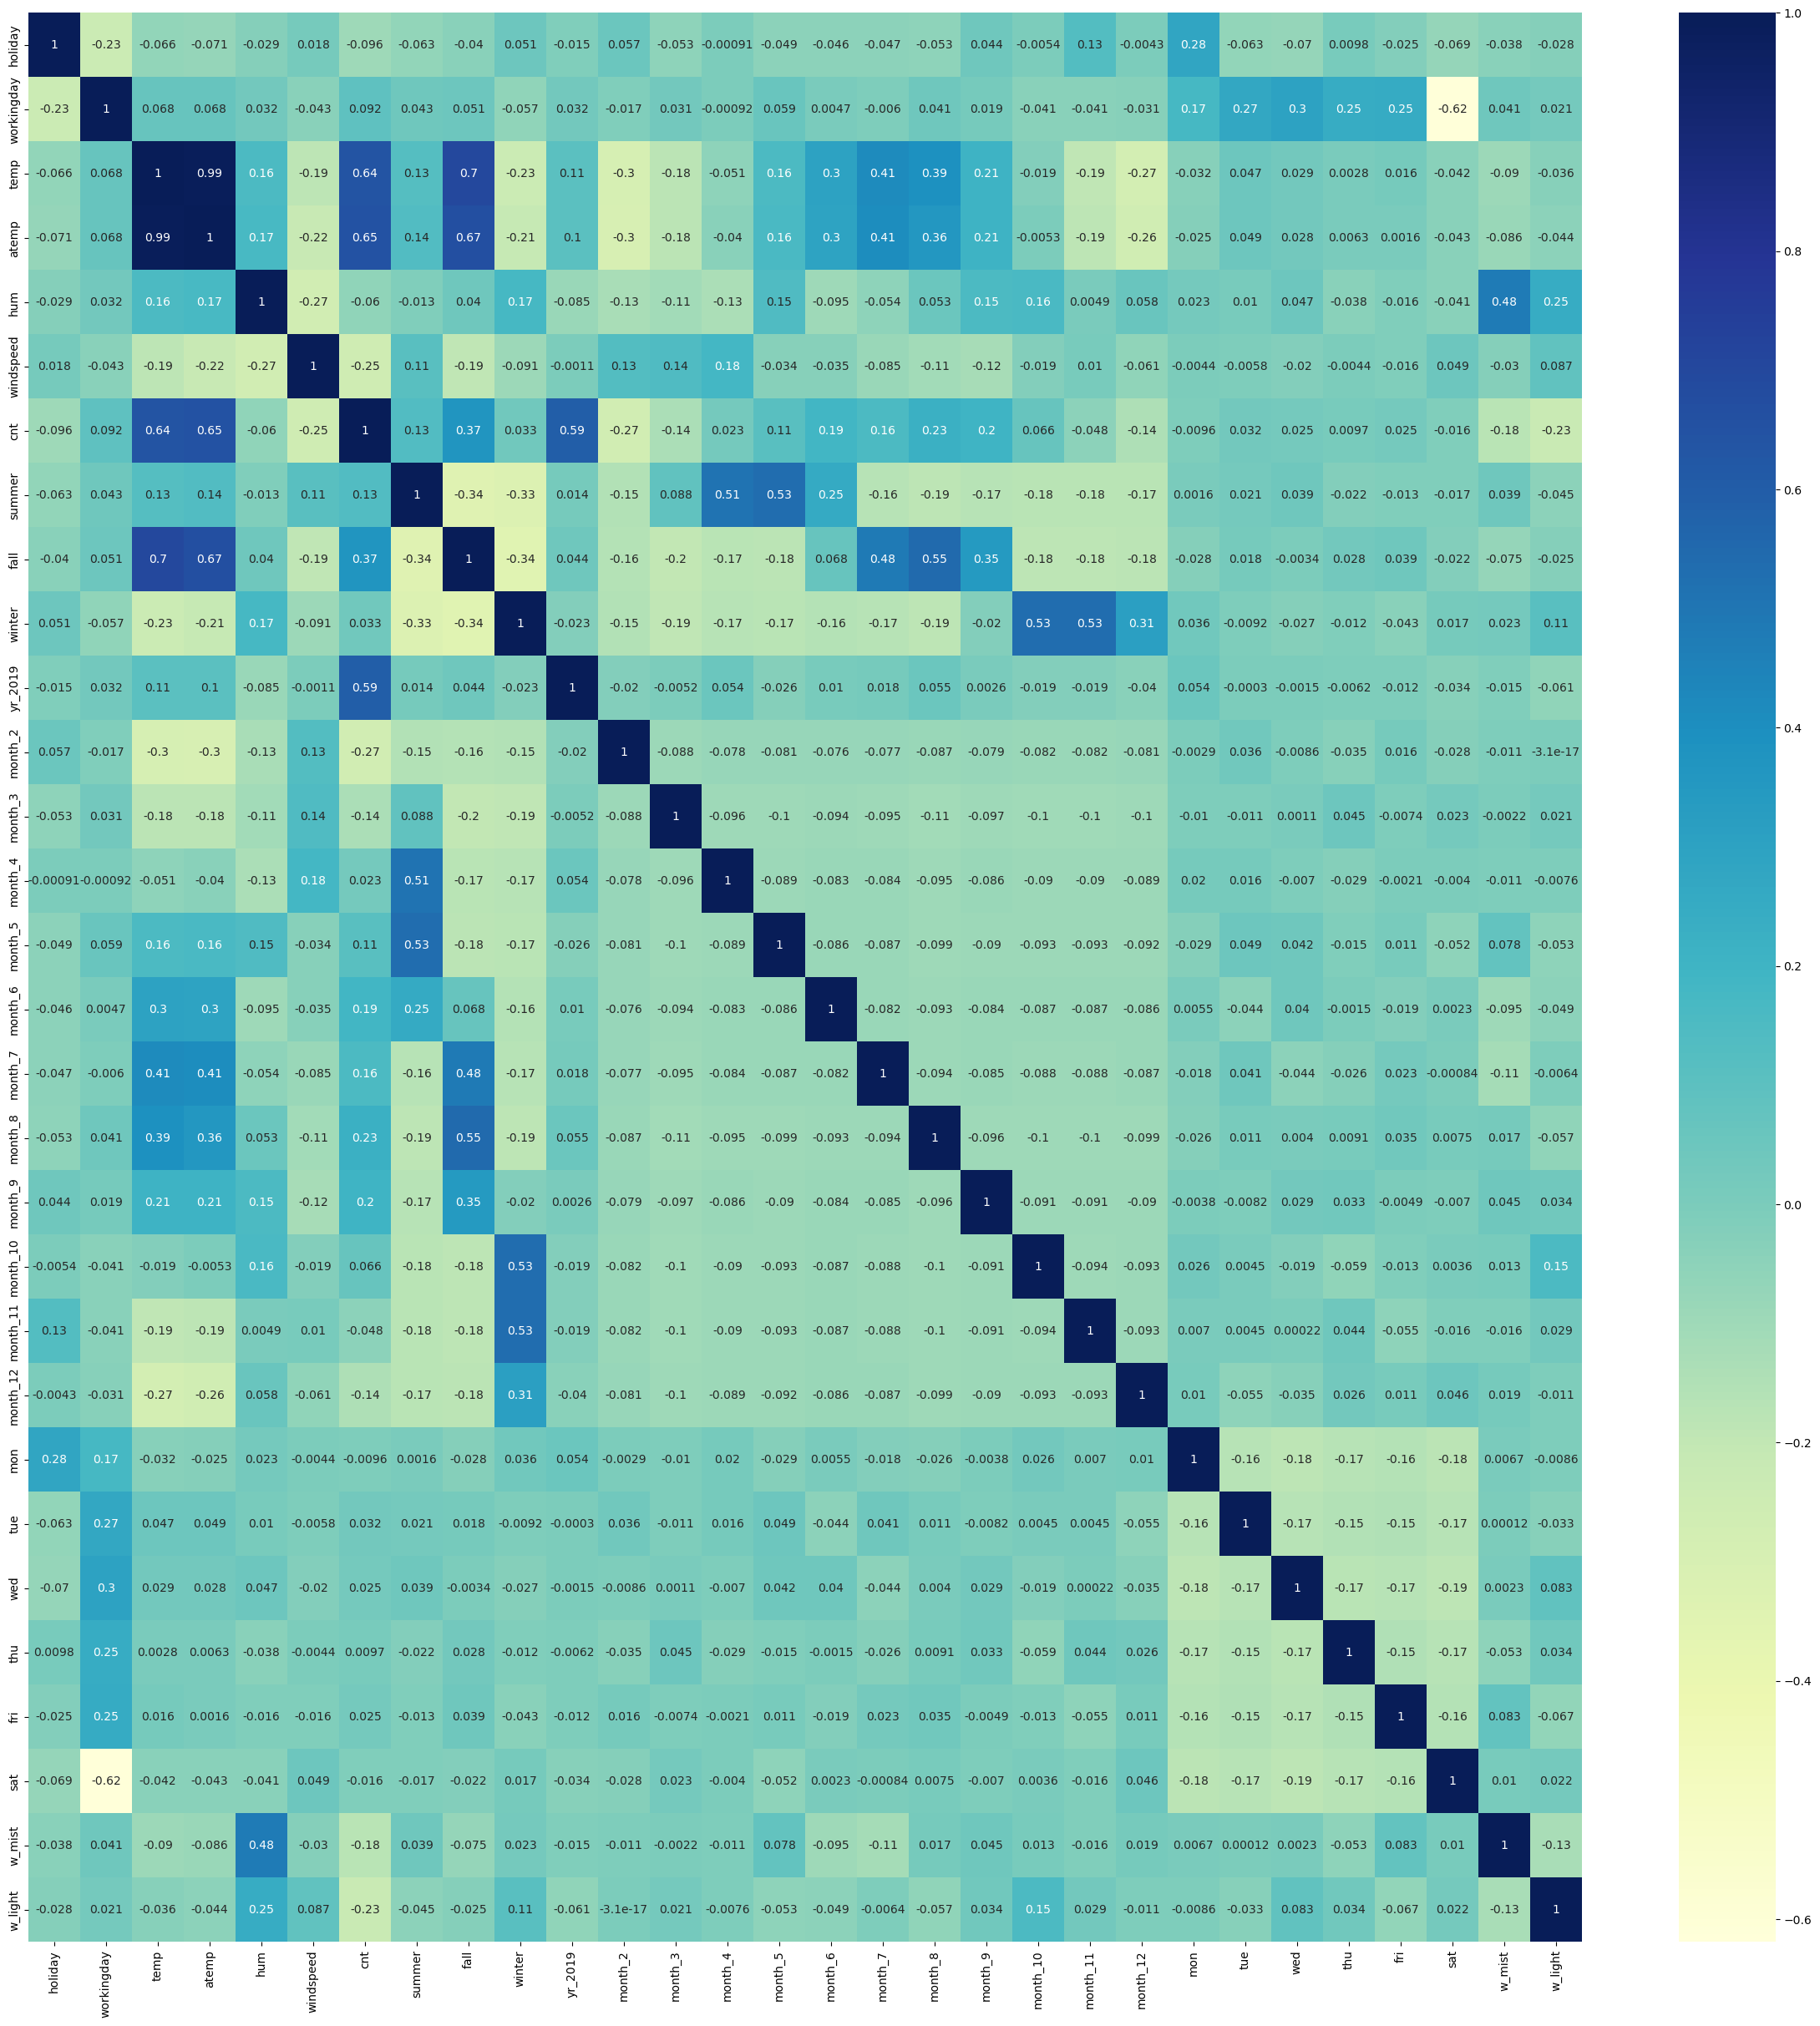

In [34]:
# Lets check the correlation
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Insight :
1.  Highest corrlation observed with temp and atemp vs cnt

<function matplotlib.pyplot.show(close=None, block=None)>

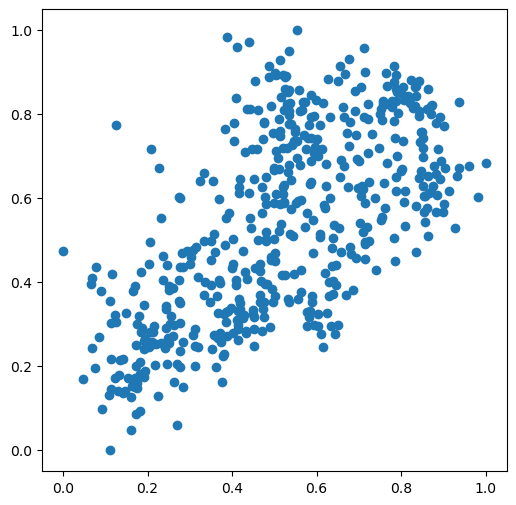

In [35]:
# Pair plot with the temp and cnt to check the relationship
plt.figure(figsize = [6,6])
plt.scatter(df_train.cnt,df_train.temp)
plt.show

#### Insight:
1. Scatter plot distribution looks linear with the cnt and temp columns

### c.Dividing into X and y sets for the model building

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
X_train.head()

holiday  workingday      temp     atemp       hum  windspeed  summer  \
653        0           1  0.509887  0.501133  0.575354   0.300794       0   
576        0           1  0.815169  0.766351  0.725633   0.264686       0   
426        0           0  0.442393  0.438975  0.640189   0.255342       0   
728        0           0  0.245101  0.200348  0.498067   0.663106       0   
482        0           0  0.395666  0.391735  0.504508   0.188475       1   

     fall  winter  yr_2019  ...  month_11  month_12  mon  tue  wed  thu  fri  \
653     0       1        1  ...         0         0    0    1    0    0    0   
576     1       0        1  ...         0         0    0    1    0    0    0   
426     0       0        1  ...         0         0    0    0    0    0    0   
728     0       0        1  ...         0         1    0    0    0    0    0   
482     0       0        1  ...         0         0    0    0    0    0    0   

     sat  w_mist  w_light  
653    0       0        0  
576    0       0        0  
426    1       1        0  
728    0       0        0  
482    1       1        0  

[5 rows x 29 columns]

### Insight:
1. After removing cnt columns , there are 29 independent variables (columns)

## Step 4: Building a linear model using training data

Fit a regression line through the training data using statmodels + add constant using add_constant(X)

### Create first fitting model   

In [38]:
import statsmodels.api as sm

# add constant
X_train_lm = sm.add_constant(X_train)

#Create first fitting model
lr = sm.OLS(y_train,X_train_lm).fit()

In [39]:
lr.params

const         0.175618
holiday      -0.042394
workingday    0.043879
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
summer        0.086796
fall          0.048580
winter        0.153968
yr_2019       0.232208
month_2       0.030389
month_3       0.063853
month_4       0.062565
month_5       0.087257
month_6       0.060862
month_7       0.023289
month_8       0.078641
month_9       0.144371
month_10      0.070260
month_11      0.020783
month_12      0.016994
mon          -0.009946
tue          -0.007753
wed           0.005823
thu           0.001806
fri           0.011556
sat           0.054533
w_mist       -0.061030
w_light      -0.256697
dtype: float64

In [40]:
# check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          8.42e-181
Time:                        16:05:17   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1756      0.030      5.777      0.0

### Insight:

1. $R^2$ and adj.$R^2$ values are desent - 0.84
2. P-values for few features are high

### Checking VIF (Variance Inflation Factor)

VIF gives a basic quantitative idea about how much the feature variables are correllated with each other and it is important parameter in the linear regression

VIF = $ 1 / (1-R^2) $

In [41]:
#import the VIF lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif


Features     VIF
0      holiday     inf
25         fri     inf
24         thu     inf
23         wed     inf
22         tue     inf
21         mon     inf
1   workingday     inf
2         temp  447.70
3        atemp  383.54
4          hum   20.79
7         fall   15.42
16     month_8   11.01
8       winter   10.93
15     month_7    9.62
6       summer    8.88
14     month_6    7.35
17     month_9    7.34
13     month_5    7.16
18    month_10    6.64
19    month_11    5.99
12     month_4    5.64
5    windspeed    4.71
20    month_12    3.78
11     month_3    3.06
27      w_mist    2.21
9      yr_2019    2.09
26         sat    1.93
10     month_2    1.71
28     w_light    1.23

### Insight:

1. For few features VIF value is infinite.

2. $ VIF_i = \frac{1}{1 - {R_i}^2} $,VIF will become infinite when $ {R_i}^2 $ is 1

Which means that the model is able to explain 100% or 1.0 of the variance which indicates the perfect fit

3. If the VIF is high(>10) and the variable should be elimated which is causing perfect multicollinearity

### Building model with the mixed approach

### RFE - Recursive Feature Elimination

In [43]:
#import RFE and linear regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [44]:
# Running RFE with the output feature = 20
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('month_2', False, 2),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 3),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 4),
 ('month_12', False, 5),
 ('mon', False, 6),
 ('tue', False, 7),
 ('wed', False, 9),
 ('thu', False, 10),
 ('fri', False, 8),
 ('sat', True, 1),
 ('w_mist', True, 1),
 ('w_light', True, 1)]

In [46]:
X_train.columns[~rfe.support_]

Index(['month_2', 'month_7', 'month_11', 'month_12', 'mon', 'tue', 'wed',
       'thu', 'fri'],
      dtype='object')

### Insight 
1. above is the list of the columns eliminated by RFE

In [47]:
# selected list
col_list = X_train.columns[rfe.support_]
col_list

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'yr_2019', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_8', 'month_9', 'month_10', 'sat', 'w_mist', 'w_light'],
      dtype='object')

In [48]:
# Create dataframe for the selction list
X_train_rfe = X_train[col_list]
X_train_rfe

holiday  workingday      temp     atemp       hum  windspeed  summer  \
653        0           1  0.509887  0.501133  0.575354   0.300794       0   
576        0           1  0.815169  0.766351  0.725633   0.264686       0   
426        0           0  0.442393  0.438975  0.640189   0.255342       0   
728        0           0  0.245101  0.200348  0.498067   0.663106       0   
482        0           0  0.395666  0.391735  0.504508   0.188475       1   
..       ...         ...       ...       ...       ...        ...     ...   
526        0           1  0.824514  0.762183  0.605840   0.355596       1   
578        0           1  0.863973  0.824359  0.679690   0.187140       0   
53         0           1  0.202618  0.218747  0.435939   0.111379       0   
350        0           0  0.248216  0.223544  0.577930   0.431816       0   
79         0           1  0.462664  0.434043  0.759870   0.529881       1   

     fall  winter  yr_2019  month_3  month_4  month_5  month_6  month_8  \
653     0       1        1        0        0        0        0        0   
576     1       0        1        0        0        0        0        0   
426     0       0        1        1        0        0        0        0   
728     0       0        1        0        0        0        0        0   
482     0       0        1        0        1        0        0        0   
..    ...     ...      ...      ...      ...      ...      ...      ...   
526     0       0        1        0        0        0        1        0   
578     1       0        1        0        0        0        0        1   
53      0       0        0        0        0        0        0        0   
350     0       1        0        0        0        0        0        0   
79      0       0        0        1        0        0        0        0   

     month_9  month_10  sat  w_mist  w_light  
653        0         1    0       0        0  
576        0         0    0       0        0  
426        0         0    1       1        0  
728        0         0    0       0        0  
482        0         0    1       1        0  
..       ...       ...  ...     ...      ...  
526        0         0    0       1        0  
578        0         0    0       0        0  
53         0         0    0       0        0  
350        0         0    1       1        0  
79         0         0    0       1        0  

[510 rows x 20 columns]

### Insight:
1. we can see there are 20 columns (as specified in RFE) and 510 row now

### Create fitting model -1

In [49]:
# add constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create fitting model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [50]:
#check summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.51e-188
Time:                        16:05:18   Log-Likelihood:                 525.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1905      0.029      6.556      0.0

### Insight

1. $ R^2 and Adj. R^2$ values are fine (0.84)
2. P-value is high for atemp

In [51]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

Features    VIF
3         temp  61.71
0        const  55.37
4        atemp  55.03
8         fall   6.71
7       summer   5.63
13     month_5   3.43
12     month_4   3.11
9       winter   2.46
14     month_6   2.28
5          hum   1.98
2   workingday   1.89
15     month_8   1.85
18         sat   1.79
11     month_3   1.63
19      w_mist   1.58
17    month_10   1.54
16     month_9   1.46
20     w_light   1.28
6    windspeed   1.27
1      holiday   1.17
10     yr_2019   1.04

### Insight:
1. temp is having high VIF : 61.71 and low p value :0.002
1. atemp is having high VIF :55.03 and high p value :0.816 - will drop atemp column

In [52]:
#dropping atemp column
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

### Rebuilding model without atemp -2

In [53]:
# add constant
X_train_new = sm.add_constant(X_train_new)

# Create fitting model 
lm = sm.OLS(y_train, X_train_new).fit()

In [54]:
#check summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.75e-189
Time:                        16:05:18   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1908      0.029      6.576      0.0

### Insight

1. $ R^2 and Adj. R^2$ values are fine (0.85, 0.84)

In [55]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

Features    VIF
0        const  55.28
7         fall   6.65
6       summer   5.63
3         temp   4.50
12     month_5   3.43
11     month_4   3.10
8       winter   2.46
13     month_6   2.27
4          hum   1.98
2   workingday   1.89
14     month_8   1.83
17         sat   1.79
10     month_3   1.63
18      w_mist   1.58
16    month_10   1.54
15     month_9   1.46
19     w_light   1.27
5    windspeed   1.22
1      holiday   1.17
9      yr_2019   1.04

### Insight:
1. VIF is high for fall when compare to others so drop and check

In [56]:
#dropping fall column
X_train_new = X_train_new.drop(['fall'], axis = 1)

### Rebuilding model without fall -3

In [57]:
# add constant
X_train_new = sm.add_constant(X_train_new)

# Create fitting model 
lm = sm.OLS(y_train, X_train_new).fit()

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.72e-189
Time:                        16:05:18   Log-Likelihood:                 523.03
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1902      0.029      6.534      0.000       0.133       0.247
holiday       -0.0523      0.027     -1.949      0.052      -0.105       0.000
workingday     0.0434      0.011      3.776      0.000       0.021       0.066
temp           0.5230      0.024     21.523      0.000       0.475       0.571
hum           -0.1692      0.037     -4.518      0.000      -0.243      -0.096
windspeed     -0.1894      0.025     -7.472      0.000      -0.239      -0.140
summer         0.0684      0.020      3.470      0.001       0.030       0.107
winter         0.1424      0.012     11.622      0.000       0.118       0.167
yr_2019        0.2293      0.008     28.788      0.000       0.214       0.245
month_3        0.0392      0.016      2.394      0.017       0.007       0.071
month_4        0.0435      0.026      1.699      0.090      -0.007       0.094
month_5        0.0584      0.026      2.268      0.024       0.008       0.109
month_6        0.0323      0.022      1.448      0.148      -0.012       0.076
month_8        0.0676      0.017      3.936      0.000       0.034       0.101
month_9        0.1344      0.017      8.047      0.000       0.102       0.167
month_10       0.0430      0.017      2.513      0.012       0.009       0.077
sat            0.0529      0.014      3.656      0.000       0.024       0.081
w_mist        -0.0584      0.010     -5.648      0.000      -0.079      -0.038
w_light       -0.2480      0.026     -9.540      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       71.760   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.663
Skew:                          -0.710   Prob(JB):                     7.96e-41
Kurtosis:                       5.583   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insight

1. $ R^2 and Adj. R^2$ values are fine (0.85, 0.84) - no impact of dropping column fall

In [59]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

Features    VIF
0        const  55.28
6       summer   4.69
11     month_5   3.33
10     month_4   3.10
12     month_6   2.23
3         temp   1.96
4          hum   1.94
2   workingday   1.89
7       winter   1.83
16         sat   1.79
13     month_8   1.67
17      w_mist   1.57
9      month_3   1.54
15    month_10   1.51
14     month_9   1.34
18     w_light   1.26
5    windspeed   1.21
1      holiday   1.17
8      yr_2019   1.03

### Insight:
1. VIF is more for summer when compare to others so drop and check

In [60]:
#dropping summer column
X_train_new = X_train_new.drop(['summer'], axis = 1)

### Rebuilding model without summer -4

In [61]:
# add constant
X_train_new = sm.add_constant(X_train_new)

# Create fitting model 
lm = sm.OLS(y_train, X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.83e-188
Time:                        16:05:18   Log-Likelihood:                 516.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     492   BIC:                            -921.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1856      0.029      6.313      0.0

### Insight

1. $ R^2 and Adj. R^2$ values are fine (0.84)

In [62]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

Features    VIF
0        const  55.16
3         temp   1.96
4          hum   1.93
2   workingday   1.89
6       winter   1.83
15         sat   1.79
12     month_8   1.67
16      w_mist   1.57
14    month_10   1.51
11     month_6   1.48
10     month_5   1.38
13     month_9   1.34
17     w_light   1.26
8      month_3   1.25
9      month_4   1.24
5    windspeed   1.21
1      holiday   1.17
7      yr_2019   1.03

### Insight:
  1. For holiday  p-value - 0.058 and VIF 1.17 , lets drop and check

In [63]:
#dropping holiday column
X_train_new = X_train_new.drop(['holiday'], axis = 1)

### Rebuilding model without holiday -5

In [64]:
# add constant
X_train_new = sm.add_constant(X_train_new)

# Create fitting model 
lm = sm.OLS(y_train, X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.54e-188
Time:                        16:05:18   Log-Likelihood:                 514.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     493   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.029      6.067      0.0

### Insight

1. $ R^2 and Adj. R^2$ values are fine (0.84)
2. P-values for all features are low 

In [65]:
#create dataframe for all the features and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

Features    VIF
0        const  53.68
2         temp   1.96
3          hum   1.93
5       winter   1.83
11     month_8   1.67
1   workingday   1.66
14         sat   1.65
15      w_mist   1.57
13    month_10   1.50
10     month_6   1.48
9      month_5   1.38
12     month_9   1.34
16     w_light   1.26
7      month_3   1.25
8      month_4   1.23
4    windspeed   1.21
6      yr_2019   1.03

### Insight :

VIF values are also low for all the features


### Let us try and check the impact of dropping temp variable


In [66]:
#dropping temp column 
X_train_new1 = X_train_new
X_train_new1 = X_train_new1.drop(['temp'], axis = 1)


In [67]:
# add constant
X_train_new1 = sm.add_constant(X_train_new1)

# Create fitting model 
lm1 = sm.OLS(y_train, X_train_new1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     79.03
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.21e-120
Time:                        16:05:18   Log-Likelihood:                 350.54
No. Observations:                 510   AIC:                            -669.1
Df Residuals:                     494   BIC:                            -601.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3186      0.039      8.164      0.0

### Insight:

After removing temp column, there is huge impact on the R-squared and Adj. R- value so revering the changes back and no more dropping of columns

### Final Model

In [68]:
# Final Model
# add constant
X_train_new = sm.add_constant(X_train_new)

# Create fitting model 
lm = sm.OLS(y_train, X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.54e-188
Time:                        16:05:18   Log-Likelihood:                 514.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     493   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.029      6.067      0.0

### Insights:

1.Final $ R^2 $ is 0.84 (decent) , Adj. $ R^2 $ is 0.84(decent), prob. F stats is less than 0.05 (overall model fit is significant) which is good fit

2.The Top 3 Features : temp, yr_2019, windspeed

(writting eqn only with top 3 - we need to include rest as well)

    cnt = 0.1765 + (0.5199 * temp) + (0.2995 * yr_2019) - (0.19 * windspeed)......

#### Positive impact:
1. Temp 
2. Year - yr_2019
3. months - 4(april),5(may),9(sept)

#### Negative impact:
1. Weather : weather light
2. windspeed
3. hum - humidity

## Step 5: Residual Analysis of the train data

In [69]:
# Predict the value (y_train_cnt)
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'error')

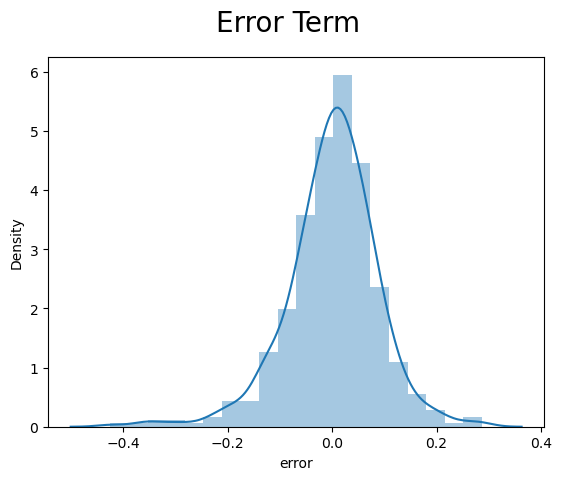

In [70]:
# plot histogram for error term
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins = 20)
fig.suptitle("Error Term", fontsize = 20)
plt.xlabel("error",fontsize = 10)

### Insight:
1. Histogram of the Error Term plot is normal distribution with mean value 0

## Step 6: Making Predictions

In [71]:
col_list = X_train_new.columns
col_list

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'winter', 'yr_2019',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9',
       'month_10', 'sat', 'w_mist', 'w_light'],
      dtype='object')

In [72]:
col_list = ['workingday', 'temp', 'hum', 'windspeed', 'winter', 'yr_2019',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9',
       'month_10', 'sat', 'w_mist', 'w_light']

In [73]:
# apply scalar for test data for numeric variables
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing X and y variables

In [74]:
y_test = df_test.pop('cnt')

In [75]:
# maintain same columns as in final model dataset
X_test = df_test[col_list]

In [76]:
#add constant
X_test = sm.add_constant(X_test)

In [77]:
#Making Prediction
y_pred = lm.predict(X_test)

## Step 7: Model Evaluation

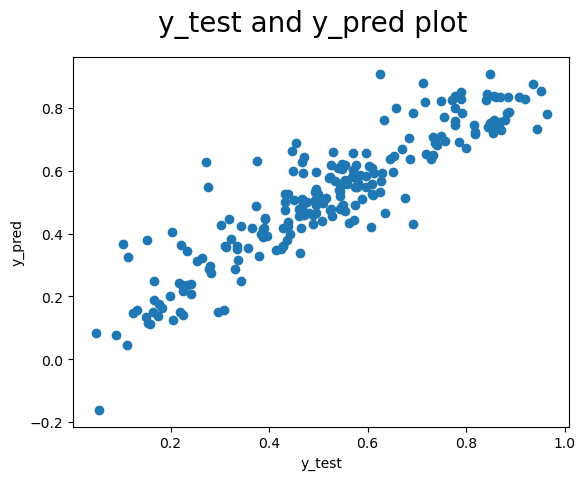

In [78]:
# ploting y_test and y_pred (predicted values) to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)

#plot title
fig.suptitle("y_test and y_pred plot", fontsize = 20)

# X label
plt.xlabel('y_test', fontsize = 10)

#Y label
plt.ylabel('y_pred', fontsize = 10)

plt.show()

### Insight:
 
 Normal distribution evident

### r2_Score

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8186483411107541

### Insight:
Model is fine/fit 